# Online Shoppers Behavior Prediction

8/7/2022

In [1]:
## Importing lib
import pandas as pd
import numpy as np
import sklearn 
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 6,5
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import missingno as msno 
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data 
shoppers=pd.read_csv("online_shoppers_intention.csv")
shoppers.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [3]:
shoppers['TrafficType'] = shoppers['TrafficType'].astype('object')
shoppers['OperatingSystems'] = shoppers['OperatingSystems'].astype('object')
shoppers['Browser'] = shoppers['Browser'].astype('object')
shoppers['Revenue']= shoppers['Revenue'].replace({True:'Yes',False:'No'})
shoppers['Region'] = shoppers['Region'].astype('object')

In [4]:
shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [5]:
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    shoppers[cols] = shoppers[cols].astype('category')

In [6]:
#feature type
shoppers.dtypes

Administrative             category
Administrative_Duration     float64
Informational              category
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                      object
dtype: object

In [7]:
shoppers.describe(exclude='number')

,Administrative,Informational,ProductRelated,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
unique,27,17,311,10,8,13,9,20,3,2,2
top,0,0,1,May,2,2,1,2,Returning_Visitor,False,No
freq,5768,9699,622,3364,6601,7961,4780,3913,10551,9462,10422


In [43]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(shoppers['Revenue'], values, color ='maroon',  width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

NameError: name 'values' is not defined

<Figure size 720x360 with 0 Axes>

In [8]:
for colum in shoppers.select_dtypes(include='object').columns:
    print(colum)
    print(shoppers[colum].unique())
    print('----------------------------------------------------')

Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
----------------------------------------------------
Revenue
['No' 'Yes']
----------------------------------------------------


In [9]:
# checking missing values
shoppers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## visualization

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

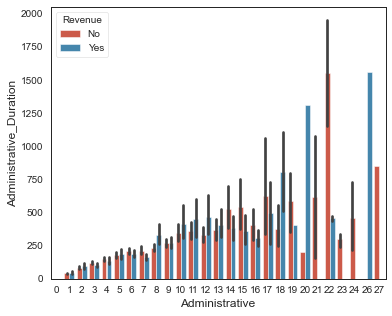

In [10]:
#admin
sns.barplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=shoppers)

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

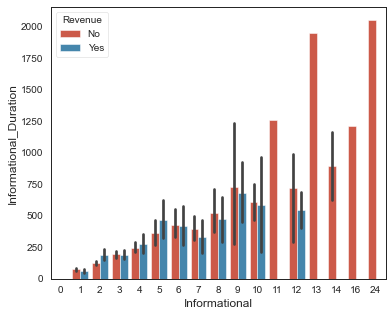

In [11]:
#info
sns.barplot(x="Informational", y="Informational_Duration",hue="Revenue", data=shoppers)

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

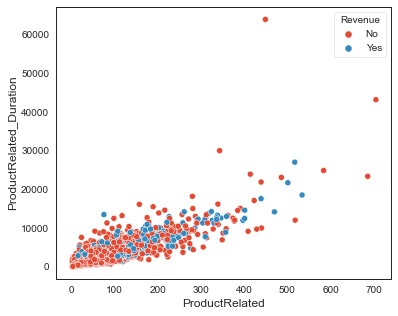

In [12]:
# product
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=shoppers)

From the plots above, it is evident that there is no multicollinearity between product related and product duration.In addition, the pages relating to products were visited throughout the vast majority of people's time spent on the website. Additionally, it provides the greatest contribution to the overall generating of income. According to the data provided by the number of visits made by customers, product pages that are directly connected to the product are of the biggest significance to the customer.

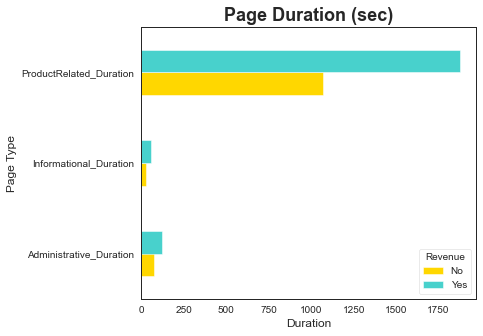

In [13]:
pd.pivot_table(shoppers,values=['Informational_Duration','Administrative_Duration','ProductRelated_Duration'],index='Revenue').T.plot(kind='barh',color=['gold', 'mediumturquoise'])
plt.title('Page Duration (sec)',fontweight='bold',size=18)
plt.ylabel('Page Type')
plt.xlabel('Duration')
plt.show()

The pages related to products received the vast majority of visitors' attention while they were on the website. As a consequence of this, product-related pages are of the biggest significance to the customer from the point of view of the generation of income.

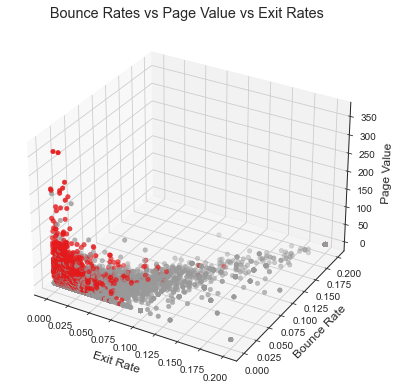

In [14]:
fig = plt.figure()
plt_ = Axes3D(fig)
plt_.scatter(shoppers['ExitRates'],shoppers['BounceRates'],shoppers['PageValues'],c=shoppers['Revenue'].replace({'Yes':0,'No':1}), cmap=plt.cm.Set1)
plt_.set_title("Bounce Rates vs Page Value vs Exit Rates")
plt_.set_ylabel("Bounce Rate")
plt_.set_xlabel("Exit Rate")
plt_.set_zlabel("Page Value")
plt.show()

Customers who did not contribute to the company's revenue are represented by red points, while customers who did contribute to the company's revenue are represented by black points. Additionally, compared to black points, clients who actually made a purchase (identified to with reds points) had a bounce rate and exit rate that are far lower. Those who ended up making purchases have a page value that is significantly higher compared to customers who did not make purchases.

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

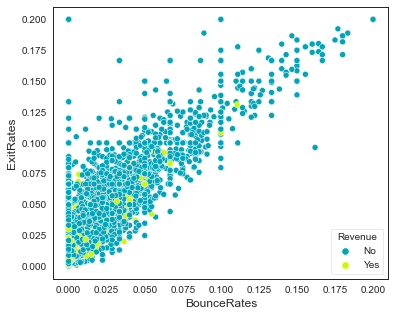

In [15]:
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=shoppers,hue='Revenue',palette='nipy_spectral')

Exit rate and bounce rate had a possitive correlation. Meaning that high bounce rate is associated with high exit rate

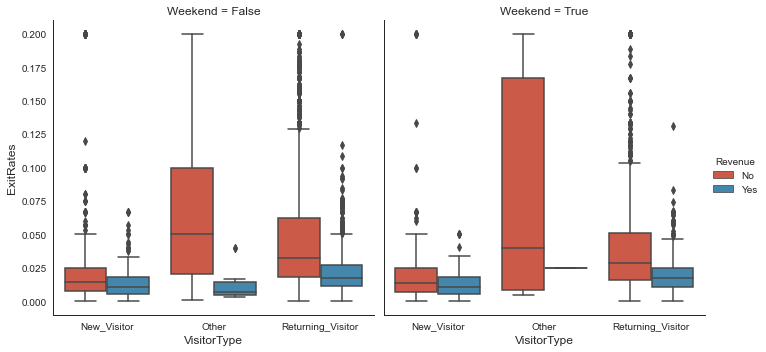

In [16]:
sns.catplot(x="VisitorType", y="ExitRates",hue="Revenue", col="Weekend", data=shoppers, kind="box");

When there is a revenue, the exit rates have a very low spread, and there isn't much of a difference in exit rates when you take into account the types of visitors as well as the weekend. When it's the weekend and there is no revenue, there is a significant difference in the exit rates that are found in other categories. It's possible that they're more of the window shopping kind. New visitors have low leave rates, which are very consistent regardless of the revenue scenario. It works quite well to keep the new customers coming back.

<AxesSubplot:>

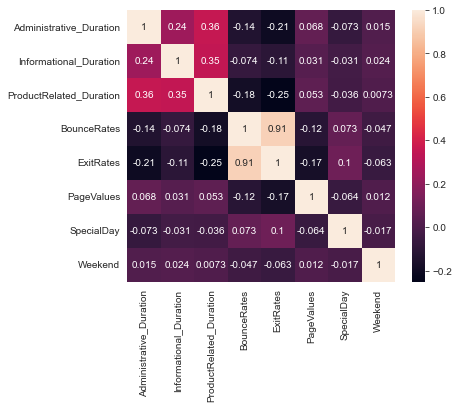

In [17]:
# correlation
sns.heatmap(shoppers.corr(),annot=True)

There is a strong association between the values of each page and the amount of revenue made.
Pages that have high bounce levels also generally have higher exit levels, which is another factor that has a negative impact on revenues.
Pages on the website that are related to products earn a substantial amount of revenue.

In [18]:
# feature selection 
shoppers.copy=shoppers.copy()

Text(0.5, 1.0, 'PageValues')

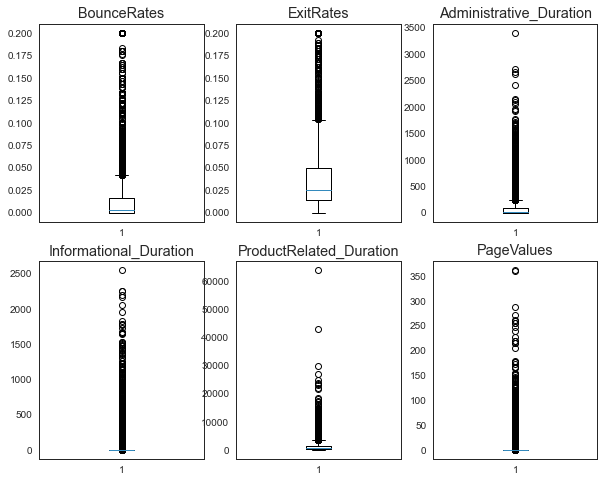

In [19]:
# checking outliers
plt.figure(figsize = (10, 8))
ptl_=plt.subplot(231)
plt.boxplot(shoppers.copy['BounceRates'])
ptl_.set_title('BounceRates')
ptl_=plt.subplot(232)
plt.boxplot(shoppers.copy['ExitRates'])
ptl_.set_title('ExitRates')
ptl_=plt.subplot(233)
plt.boxplot(shoppers.copy['Administrative_Duration'])
ptl_.set_title('Administrative_Duration')
ptl_=plt.subplot(234)
plt.boxplot(shoppers.copy['Informational_Duration'])
ptl_.set_title('Informational_Duration')
ptl_=plt.subplot(235)
plt.boxplot(shoppers.copy['ProductRelated_Duration'])
ptl_.set_title('ProductRelated_Duration')
ptl_=plt.subplot(236)
plt.boxplot(shoppers.copy['PageValues'])
ptl_.set_title('PageValues')

It is patently obvious that there are a great deal of outliers. Informational duration and page values do not contain any outliers, and if you delete the values that are considered to be outliers, there will only be one value remaining in the set. Therefore, with the exception of those two characteristics, we will be eliminating the outliers using the IQR approach. 

In [20]:
# removing outliers
num_variables=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in num_variables:
    qrt1 = shoppers.copy[cols].quantile(0.25)
    qrt3 = shoppers.copy[cols].quantile(0.75)
    i_qrt = qrt3 - qrt1     
    ftr = (shoppers.copy[cols] >= qrt1 - 1.5 * i_qrt) & (shoppers.copy[cols] <= qrt3 + 1.5 *i_qrt)
    shoppers.copy=shoppers.copy.loc[ftr]

In [21]:
#feature scaling
var_names=['Informational','ProductRelated','SpecialDay', 'Weekend','Month','TrafficType','VisitorType','Revenue','Administrative','OperatingSystems','Browser','Region']
scale_=[var for var in shoppers.copy.columns if var not in var_names]
scaler=StandardScaler()
scaler.fit(shoppers.copy[scale_])

StandardScaler()

In [22]:
shopper_final = pd.concat([shoppers.copy[['Region','Month','TrafficType','VisitorType','Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(shoppers.copy[scale_]), columns=scale_)], axis=1)
#shopper_final.head()

In [23]:
# hot encoding month and visitor type column
var=['Month','VisitorType']
shopper_data_f = shopper_final
labelenc = LabelEncoder()
for feature in var:
    shopper_data_f[feature] = labelenc.fit_transform(shopper_final[feature])
#shopper_data_f.head()

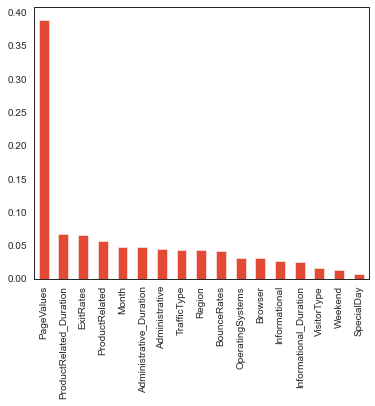

In [24]:
# feature selection 
X=shopper_data_f.drop(['Revenue'],axis=1)
y=shopper_data_f.Revenue
var_select = ExtraTreesClassifier()
var_select.fit(X,y) # fiting a selection model
feature_ranks = pd.Series(var_select.feature_importances_, index=X.columns)
feature_ranks.nlargest(17).plot(kind='bar')
plt.show()


In [25]:
# selecting features and spliting the data in 70:30 ratio
X=shopper_data_f.drop(['SpecialDay','VisitorType','Weekend','Revenue'],axis=1)
y=shopper_data_f.Revenue
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=1)


## Modeling

### Random Forest Classifier

In [26]:
rdf_model = RandomForestClassifier().fit(X_train, y_train)
rdf_model_pred = rdf_model.predict(X_test) #predicting
#precision
print(classification_report(y_test, rdf_model_pred, target_names=['No_Revenue', 'Revenue']))


              precision    recall  f1-score   support

  No_Revenue       0.94      0.96      0.95      2208
     Revenue       0.74      0.66      0.70       420

    accuracy                           0.91      2628
   macro avg       0.84      0.81      0.82      2628
weighted avg       0.90      0.91      0.91      2628



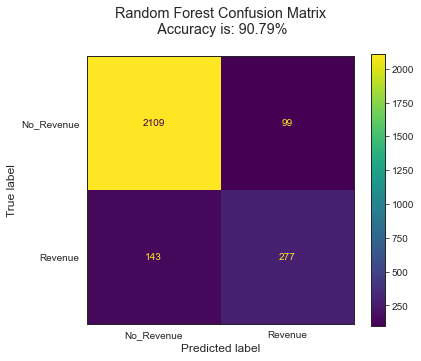

In [27]:
# confusion matrix
rdf_model_acc = round(accuracy_score(y_test, rdf_model_pred) * 100,2)
plot_confusion_matrix(rdf_model, X_test, y_test, display_labels=['No_Revenue', 'Revenue'])
plt.title(f'Random Forest Confusion Matrix\n Accuracy is: {rdf_model_acc}%\n')
plt.show()

### Passive Aggrissive Classifier

In [28]:
pac_model = PassiveAggressiveClassifier().fit(X_train, y_train)
# Predicting
pac_model_pred = pac_model.predict(X_test)
#precision
print(classification_report(y_test, pac_model_pred, target_names=['No Revenue', 'Revenue']))


              precision    recall  f1-score   support

  No Revenue       0.89      0.99      0.93      2208
     Revenue       0.82      0.34      0.48       420

    accuracy                           0.88      2628
   macro avg       0.85      0.66      0.71      2628
weighted avg       0.88      0.88      0.86      2628



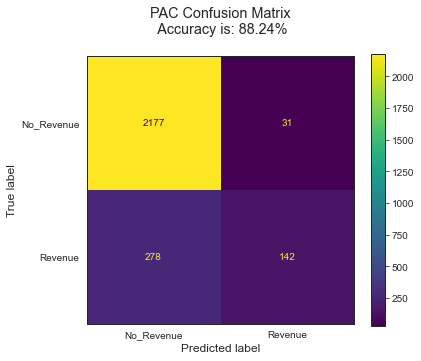

In [29]:
# confusion matrix
pac_model_acc = round(accuracy_score(y_test, pac_model_pred) * 100,2)
plot_confusion_matrix(pac_model, X_test, y_test, display_labels=['No_Revenue', 'Revenue'])
plt.title(f'PAC Confusion Matrix\n Accuracy is: {pac_model_acc}%\n')
plt.show()

### Support Vector Classifier

In [30]:
svc_model = SVC().fit(X_train, y_train)
# Predicting
svc_model_pred = svc_model.predict(X_test)
#precision
print(classification_report(y_test, svc_model_pred, target_names=['No_Revenue', 'Revenue']))


              precision    recall  f1-score   support

  No_Revenue       0.89      0.99      0.94      2208
     Revenue       0.86      0.34      0.48       420

    accuracy                           0.89      2628
   macro avg       0.87      0.66      0.71      2628
weighted avg       0.88      0.89      0.86      2628



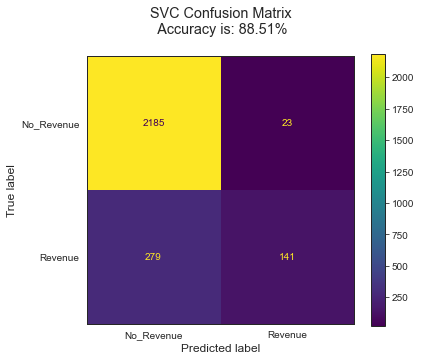

In [31]:
# confusion matrix
svc_model_acc = round(accuracy_score(y_test, svc_model_pred) * 100,2)
plot_confusion_matrix(svc_model, X_test, y_test, display_labels=['No_Revenue', 'Revenue'])
plt.title(f'SVC Confusion Matrix\n Accuracy is: {svc_model_acc}%\n')
plt.show()

Random forest model outperforms the other models with an accuracy of 90.94%

### Logistic- Model

In [34]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
# Predicting
log_model_pred = log_model.predict(X_test)
#precision
print(classification_report(y_test, log_model_pred, target_names=['No_Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No_Revenue       0.90      0.98      0.94      2208
     Revenue       0.79      0.44      0.57       420

    accuracy                           0.89      2628
   macro avg       0.85      0.71      0.75      2628
weighted avg       0.89      0.89      0.88      2628



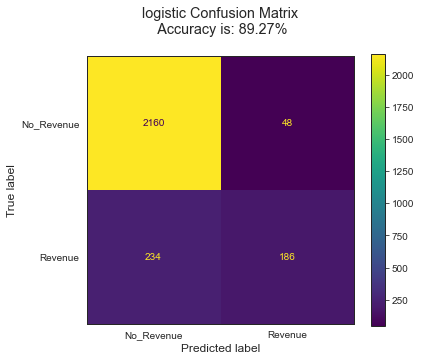

In [36]:
# confusion matrix
log_model_acc = round(accuracy_score(y_test, log_model_pred) * 100,2)
plot_confusion_matrix(log_model, X_test, y_test, display_labels=['No_Revenue', 'Revenue'])
plt.title(f'logistic Confusion Matrix\n Accuracy is: {log_model_acc}%\n')
plt.show()

### KNN model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)
# Predicting
knn_model_pred = knn_model.predict(X_test)
#precision
print(classification_report(y_test, knn_model_pred, target_names=['No_Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No_Revenue       0.87      0.97      0.92      2208
     Revenue       0.58      0.22      0.32       420

    accuracy                           0.85      2628
   macro avg       0.73      0.60      0.62      2628
weighted avg       0.82      0.85      0.82      2628



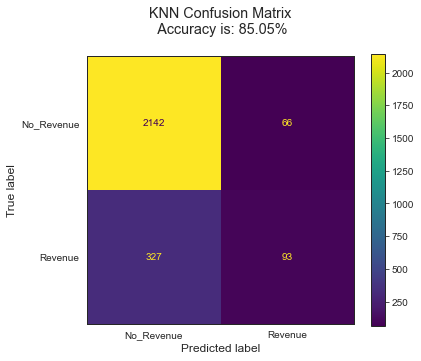

In [39]:
# confusion matrix
knn_model_acc = round(accuracy_score(y_test, knn_model_pred) * 100,2)
plot_confusion_matrix(knn_model, X_test, y_test, display_labels=['No_Revenue', 'Revenue'])
plt.title(f'KNN Confusion Matrix\n Accuracy is: {knn_model_acc}%\n')
plt.show()